# DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP

## GRIP @ THE SPARKS FOUNDATION

## AUTHOR:APOORVA KHARWADE

### Task 1 : Prediction using Supervised Machine Learning

## Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Importing Liabraries

In [2]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

## Importing data

In [4]:
# Reading data from remote link
import dask
# url ="http://bit.ly/w-data"
l_data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")
l_data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## EDA

In [5]:
l_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
l_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
l_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
l_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Visualization

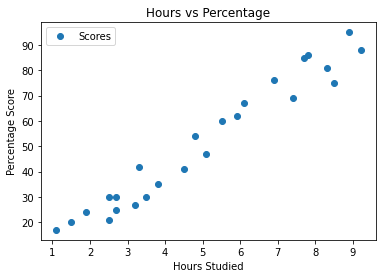

In [44]:
# Plotting the distribution of scores
l_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### From the graph we can safely assume a positive linear relation between the number of hours studied and percentage of score.

## Preparing the data

In [26]:
x = l_data.iloc[:, :-1].values  
y = l_data.iloc[:, 1].values

## Then split this data training and test sets

In [29]:
# Split the data into train and test sets
# we will do this by using Scikit-Learn's built-in train_test_split()method
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

## Training the algorithm

In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("Training complete.")

Training complete.


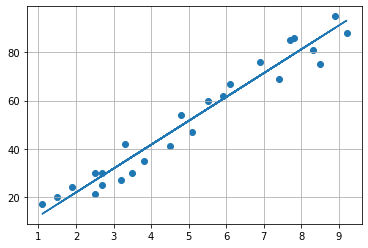

In [45]:
# Plotting the regression line
line = model.coef_*x + model.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line)
plt.grid()
plt.show()

## Making Predictions

In [37]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the score

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [38]:
#Comparing Actual vs Predicted
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<AxesSubplot:>

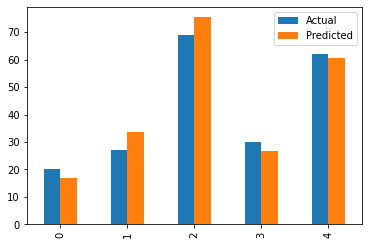

In [40]:
# Plot bar graph for predictive data
data_plot=df.head()
data_plot.plot(kind = "bar")

## Evaluating the model

In [41]:
print(f'THE TRAIN SCORE; {model.score(x_train,y_train)}')
print(f'THE TEST SCORE; {model.score(x_train,y_train)}')
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(f'MEAN ABSOLUTE ERROR :' ,mean_absolute_error(y_test,y_pred))
print(f'MEAN SQUARED ERROR :' ,mean_squared_error(y_test,y_pred))


THE TRAIN SCORE; 0.9515510725211552
THE TEST SCORE; 0.9515510725211552
MEAN ABSOLUTE ERROR : 4.183859899002975
MEAN SQUARED ERROR : 21.5987693072174


## Evaluating What will be predicted score if a student study for 9.25 hrs in a day?

In [43]:
# We can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538
